# Imports

In [1]:
import input_generator as gen

In [2]:
input_folder = '../../compute/input/'

# Materials

In [3]:
# c ********************
# c begin material cards
# c ********************
# c Mix Mo=15 *******************************
# m1	14000	-0.2032	$Silicon
# 	13027	-0.1611	$Aluminum
# 	26000	-0.0315	$Iron
# 	6000	-0.0870	$Carbon
# 	8016	-0.5027	$Oxygen
# 	1001	-0.0145	$Hydrogen
# c  **********************************
# m5	82207 1 $Lead
# c ****************************************
# c	LaBr detector
# c ****************************************
# m7       35079    -0.2946	$ Br79
# 	 35081	  -0.3069       $ Br81
#   	 57139    -0.3485	$ La139
# 	 58140    -0.0500 	$ Ce140
# c ****************************************
# c m7       35079	-0.316063    $ Br79 
# c	   35081	-0.315242    $ Br81 
# c 	   58136	-0.000066    $ Ce136
# c	   58138	-0.000090    $ Ce138
# c	   58140	-0.032308    $ Ce140
# c	   58142	-0.004118    $ Ce142
# c	   57138.80c    -0.000293    $ La138
# c	   57139.80c	-0.331817    $ La139
# c ************ air den=1.15e-3g/cc********
# m12     8016 -0.23
#         7014 -0.77

In [4]:
LaBr_detector = gen.Material("Detector", 7, {
                                                        35079: -0.2946,
                                                        35081: -0.3069,
                                                        57139: -0.3485,
                                                        58140: -0.0500
                                                        })

# Mo_15 = gen.Material("Mo_15", 1, {
#                                     14000: -0.2032,
#                                     13027: -0.1611,
#                                     26000: -0.0315,
#                                     6000: -0.0870,
#                                     8016: -0.5027,
#                                     1001: -0.0145
#                                     })

Pb = gen.Material("Pb", 5, {
                            82207: 1
                            })

air = gen.Material("Air", 12, {
                                8016: -0.23,
                                7014: -0.77
                                })

materials = [
    LaBr_detector, 
    # Mo_15, 
    Pb, 
    air
    ]

In [5]:
# c SURFACE CARDS
# c
# c %%%%%%%%%%%
# c Sample Volume
# c %%%%%%%%%%%
# 1 rcc 0.0 0.0 48.0  0.0 0.0 76.0  45 $30 - distance source-surface, 60 - thickness, 50 - radius
# c 1 rpp -500 500 -500 500 48 348 $Soil xmin xmax ymin ymax zmin zmax
# c %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# c Active Detector Region
# c %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 21 rcc -10.2  45.5 20.3   20.3 0.0 0.0   4.5 $Detector 1 Base center, Hx,Hy,Hz, radius 
# 22 rcc -10.2 -45.5 20.3   20.3 0.0 0.0   4.5 $Detector 2
# c %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# c Shielding Pb
# c %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 31 rpp -20.3 20.3 7.6 33 2.54 15.2 $Pb xmin xmax ymin ymax zmin zmax
# 32 rpp -20.3 20.3 -33 -7.6 2.54 15.2 $Pb xmin xmax ymin ymax zmin zmax
# c ************************
# 200 so 1500

In [6]:
# soil = gen.cylinder(1, pos = (0.0, 0.0, 48.0), dir = (0.0, 0.0, 1), r=45, height=45)
detector1 = gen.cylinder(21, pos = (-10.2, 45.5, 20.3), dir = (1, 0, 0), r=4.5, height=20.3)
detector2 = gen.cylinder(22, pos = (-10.2, -45.5, 20.3), dir = (1, 0, 0), r=4.5, height=20.3)
sheilding1 = gen.rpp(31, min = (-20.3, 7.6, 2.54), max = (20.3, 33, 15.2))
sheilding2 = gen.rpp(32, min = (-20.3, -33, 2.54), max = (20.3, -7.6, 15.2))
world = gen.sphere(200, pos = (0, 0, 0), r = 1500)

surfaces = [
    # soil, 
    detector1, 
    detector2, 
    sheilding1, 
    sheilding2, 
    world]

# Cells

In [7]:
# c @@@@@@@@@@ Detectors @@@@@@@@@@@@@@@@@
# c
# 101 7 -5.08 -21 imp:n,p 1 $LaBr Detector #1 Active Region
# 102 7 -5.08 -22 imp:n,p 1 $LaBr Detector #2 Active Region
# c
# c @@@@@@@@@ Shielding @@@@@@@@@@@@@@@@@
# c
# 121 5 -11.29 -31 imp:n,p 1 $Pb1
# 122 5 -11.29 -32 imp:n,p 1 $Pb2
# c
# c @@@@@@@@@@ SOIL VOLUME @@@@@@@@@@@
# c
# 20 1 -1.542 -1 imp:n,p 1 $ SOIL VOLUME
# c
# 30 12 -0.00129 -200 #101 #102 #121 #122 #20    imp:n,p 1 $Rest of the World
# 31 0 200 imp:n,p 0 $Outside world

In [8]:
# class cell():
#     def __init__(self, cell_id, name, material, density, surfaces, importance=None):
#         self.cell_id = cell_id
#         self.name = name
#         self.material = material
#         self.density = density
#         self.surfaces = surfaces
#         self.importance = importance

In [9]:
outside_world = gen.cell(2, 'outside_world', 0, None, '200', importance='imp:n,p 0')
# rest_of_the_world = gen.cell(1, 'rest_of_the_world', air.id, -0.00129, '-200 #101 #102 #121 #122 #20', importance='imp:n,p 1')
# soil_cell = gen.cell(20, 'soil', Mo_15.id, 1.542, '-1', importance='imp:n,p 1')
detector1_cell = gen.cell(101, 'detector1', LaBr_detector.id, 5.08, '-21', importance='imp:n,p 1')
detector2_cell = gen.cell(102, 'detector2', LaBr_detector.id, 5.08, '-22', importance='imp:n,p 1')
sheilding1_cell = gen.cell(121, 'sheilding1', Pb.id, 11.29, '-31', importance='imp:n,p 1')
sheilding2_cell = gen.cell(122, 'sheilding2', Pb.id, 11.29, '-32', importance='imp:n,p 1')

cells = [
    outside_world, 
    # rest_of_the_world, 
    # soil_cell, 
    detector1_cell, 
    detector2_cell, 
    sheilding1_cell, 
    sheilding2_cell
    ]

# Tallies

In [10]:
gebs = [None, [-0.026198, 0.059551, -0.037176]]
time_bins = ['50 1e5','0 150i 150']
tmcs = [None, [0,50]]

n_tallies = len(gebs) * len(time_bins) * len(tmcs)
tal_headers = [i for i in range(1, n_tallies+1)]
i=0
tallies = []
for geb in gebs:
    for time_bin in time_bins:
        for tmc in tmcs:
            i+=1
            tallies.append(
                gen.tally(
                    tally_id=(i*10)+6,
                    tally_type=6,
                    particle='e', 
                    cells='(101 102)',
                    ))
            tallies.append(
                gen.tally(
                    tally_id=(i*10)+8,
                    tally_type=8,
                    particle='p', 
                    cells='(101 102)',
                    energy_bins='0 1e-5 932i 8.4295',
                    time_bins=time_bin,
                    geb=geb,
                    tmc=tmc,
                    phl=(i*10)+6,
                    ))

# Generation

In [11]:
# sdef pos=0 0 0   par=1   erg=14.0  wgt=1   vec= 0 0 1   dir=d1
# si1  -1 .93 1
# sp1   0  0.0  1.0

source = gen.source(1, (0, 0, 0), 14, si='-1 0.93 1', sp='0 0 1')

In [12]:
slice_levels = [1, 2, 3, 5, 10, 50, 100, 500, 1000]

In [13]:
# Mo_15 = gen.Material("Mo_15", 1, {
#                                     14000: -0.2032,
#                                     13027: -0.1611,
#                                     26000: -0.0315,
#                                     6000: -0.0870,
#                                     8016: -0.5027,
#                                     1001: -0.0145
#                                     })
# soil_cell = gen.cell(20, 'soil', Mo_15.id, 1.542, '-1', importance='imp:n,p 1')
# soil = gen.cylinder(1, pos = (0.0, 0.0, 48.0), dir = (0.0, 0.0, 1), r=45, height=45)

In [14]:
import soilsections as ss

In [15]:
filenames = []
lms = []
for level in slice_levels:
    _surfaces = surfaces
    _cells = cells.copy()
    _materials = materials

    # example
    extent = (-45, 45, -45, 45, 48, 48+45) # x0, x1, y0, y1, z0, z1 min(0) and max(1) of the grid
    res = (1, 1, level) # number of cells in each direction


    noncarbon_rel_portions = [0.44, 0.55, 0.01] # relative portions of the noncarbon elements
    noncarbon_labels = ['14000', '8016', '1001'] # labels of the noncarbon elements

    # below is used to assign the surface, material, and cell ids
    surface_header = '100' #puts a 1 before the surface id
    surface_footer = ''
    mat_header = '200'
    mat_footer = ''
    cell_header = '400'
    cell_footer = ''

    v_min = 0.05
    v_max = 0.25
    conc_func = lambda x: ss.vertical_linear_gradient_dist(x, extent[4], extent[5], v_min, v_max)


    _soil_cells, _edge_index, _soil_surfaces, _soil_mats, _lms = ss.make_mcnp(extent, res, conc_func, noncarbon_rel_portions, noncarbon_labels, surface_header, surface_footer, mat_header, mat_footer, cell_header, cell_footer)
    _edge_index = f"#({_edge_index[0]} -{_edge_index[1]} {_edge_index[2]} -{_edge_index[3]} {_edge_index[4]} -{_edge_index[5]})"
    rest_of_the_world = gen.cell(1, 'rest_of_the_world', air.id, -0.00129, '-200 #101 #102 #121 #122 '+_edge_index, importance='imp:n,p 1')
    _cells.append(rest_of_the_world)

    title = f"runWith"+str(level)+"Slices"
    filenames.append(title)
    filename = input_folder+title+'.inp'
    # filenames.append(filename)
    mcnp = gen.sim(
        title, 
        nps=1e9,
        prdmp=[-60, -60, -1],
        source=source,
        tallies=tallies,
        surfaces=_surfaces,
        materials=_materials,
        cells=_cells,
        )

    outtext = str(mcnp)
    o = outtext.split('\n\n')
    oo = o[-3:]
    oo[0] = oo[0]+'\n'+_soil_cells
    oo[1] = oo[1]+'\n'+_soil_surfaces
    oo[2] = _soil_mats+oo[2]
    o[-3:] = oo
    outtext = '\n'.join(o)
    _lms = -_lms
    lms.append(_lms[:, 0].tolist())
    with open(filename, 'w') as f:
        f.write(outtext)
        f.close()

In [16]:
import pandas as pd


df = pd.DataFrame(filenames, columns=['name'])
df.to_csv('filenames.csv', index=False)

In [17]:
# plot the simulations

In [18]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np

In [20]:
df['slice_level'] = slice_levels
df['lms'] = lms

# pickle the dataframe
df.to_pickle('df.pkl')

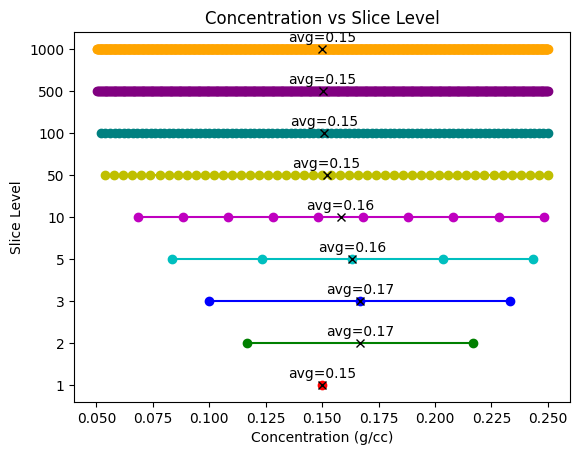

In [21]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'teal', 'purple', 'orange']
for i in range(len(lms)):
    color = colors[i]
    plt.plot(lms[i], [i]*len(lms[i]), label=f"level {slice_levels[i]}", marker='o', color=color)
    plt.plot(np.average(lms[i]), [i], label=f"level {slice_levels[i]}", marker='x', color='black')
plt.xlabel('Concentration (g/cc)')
plt.ylabel('Slice Level')
plt.title('Concentration vs Slice Level')
plt.yticks(range(len(lms)), slice_levels)
# plt.legend()
# add annotation "x is the average
for i in range(len(lms)):
    avg = np.average(lms[i])
    plt.annotate(f'avg={avg:.2f}', (avg, i), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

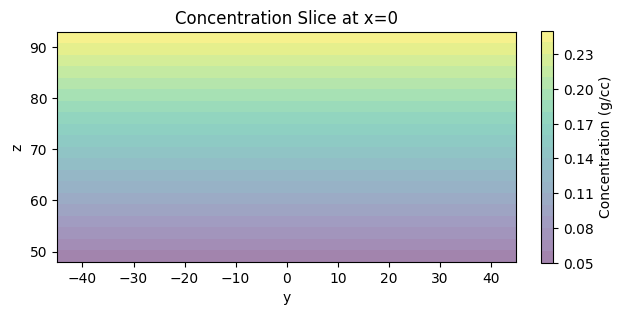

In [48]:
fig, ax = plt.subplots()

contourf, conc = ss.yz_slice_inspect(ax, conc_func, -45, 45, 48, 48+45, v_min=v_min, v_max=v_max)
# aspect ratio = 1
ax.set_aspect('equal', adjustable='box')
# add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', fraction=0.0234)
cbar.set_label('Concentration (g/cc)')
plt.xlabel('y')
plt.ylabel('z')
plt.title('Concentration Slice at x=0')


# export as carbon_content.png
plt.savefig('carbon_content.png')

plt.show()